In [1]:
%pylab inline
import h5py
import grispy as gsp
import programas

Populating the interactive namespace from numpy and matplotlib


## Galaxy positions

In [2]:
file = h5py.File('/mnt/projects/bias_mock/galpos_RedSample.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]

## Void positions (centers)

In [3]:
v0 = np.loadtxt('sphvds_raul-0.8.dat')
centres = v0[:,2:5]

### Formo el grid con condiciones de bordes periodicas

In [4]:
Lbox = 1440
grid = gsp.GriSPy(pos, N_cells=32)
periodic = {0: (0, Lbox), 1: (0, Lbox), 2: (0, Lbox)}
grid.set_periodicity(periodic, inplace=True)

In [5]:
bines = 20
rmin = 0
rmax = 3
#bineado = np.logspace(np.log10(rmin),np.log10(rmax),bines) 
bineado = np.linspace(rmin,rmax,bines)

In [6]:
npart = len(pos)
rhomean = npart/Lbox**3

(-1.0, 3.0)

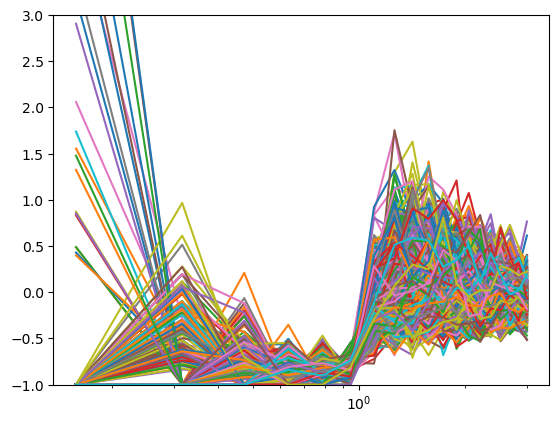

In [8]:
nvoids = 1000

perfiles = np.zeros([bines-1,nvoids])
for i in range(nvoids):

    centres = v0[i,2:5]
    rvoid = v0[i,1]
    x = centres[0]
    y = centres[1]
    z = centres[2]

    perfil = programas.profile(x,y,z,rvoid,grid,bines,bineado)
    volumen = programas.profile_volume(rvoid,bines,bineado)
    
    delta = ((perfil/volumen)-rhomean)/rhomean
    
    perfiles[:,i] = delta
    
    plt.plot(bineado[1:],delta)

plt.semilogx()
plt.ylim(-1,3)

In [10]:
plt.plot(bineado[1:],pg.mean_profile(perfiles))

NameError: name 'pg' is not defined

In [19]:
ID = 30
centres = v0[ID,2:5]

x = centres[0]
y = centres[1]
z = centres[2]
rvoid = v0[ID,1]

In [20]:
rvoid

20.29924201965332

In [21]:
perfil = programas.profile(x,y,z,rvoid,grid,bines,bineado)

In [7]:
npart = len(pos)
rhomean = npart/Lbox**3

[]

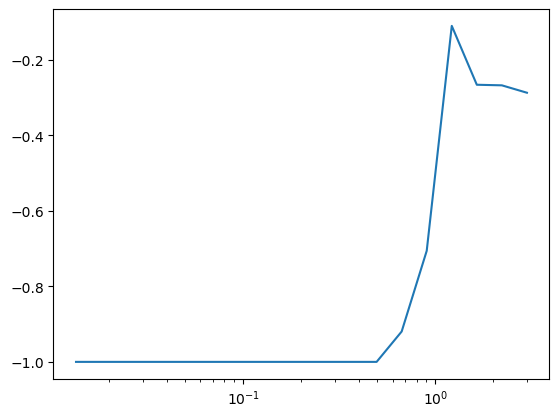

In [24]:
#delta = (perfil/profile_volume(rvoid,bines,bineado)-rhomean)/rhomean
#plt.plot(bineado[1:],delta)
#plt.semilogx()